In [1]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
from textblob import TextBlob

In [2]:
# Read df of products
df_prod = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/raw/raw_products.csv')
df_prod.head(5)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [3]:
# Review columns
df_prod.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [4]:
# Read df of reviews
df_rev = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/raw/raw_reviews.csv')
df_rev.head(5)

C:\Users\annie\AppData\Local\Temp\ipykernel_26744\2922152932.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rev = pd.read_csv('https://raw.githubusercontent.com/r41ss4/rennes_ds/refs/heads/main/data/raw/raw_reviews.csv')


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [5]:
# Review columns
df_rev.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

## clean dataset 1(df_prod)

In [6]:
# Make a copy of clean_datan1 to clean
clean_datan1 = df_prod

In [7]:
# Review the data and how many rows have missing information in each columns
clean_datan1.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [8]:
clean_datan1.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [9]:
clean_datan1 = clean_datan1.drop_duplicates()

In [10]:
# Convert and fill NaN using the mean of each brand's primary category
columns_to_convert = ['value_price_usd', 'sale_price_usd', 'rating']

clean_datan1[columns_to_convert] = (
    clean_datan1[columns_to_convert]
    .apply(pd.to_numeric, errors='coerce')
    .groupby([clean_datan1['brand_name'], clean_datan1['primary_category']])
    .transform(lambda x: x.fillna(x.mean()))
)

In [11]:
# select the categorical columns 
obj_columns = clean_datan1.select_dtypes(include=('object')).columns
# replace the missing value by the column Mode
for col in obj_columns :
    clean_datan1[col] = clean_datan1[col].fillna(clean_datan1[col].mode()[0])

In [12]:
# Review the data and how many rows have missing information in each columns
clean_datan1.isna().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                  25
reviews                278
size                     0
variation_type           0
variation_value          0
variation_desc           0
ingredients              0
price_usd                0
value_price_usd       3348
sale_price_usd        6456
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights               0
primary_category         0
secondary_category       0
tertiary_category        0
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [13]:
clean_datan1.dtypes

product_id             object
product_name           object
brand_id                int64
brand_name             object
loves_count             int64
rating                float64
reviews               float64
size                   object
variation_type         object
variation_value        object
variation_desc         object
ingredients            object
price_usd             float64
value_price_usd       float64
sale_price_usd        float64
limited_edition         int64
new                     int64
online_only             int64
out_of_stock            int64
sephora_exclusive       int64
highlights             object
primary_category       object
secondary_category     object
tertiary_category      object
child_count             int64
child_max_price       float64
child_min_price       float64
dtype: object

In [14]:
# select the numerical columns 
num_columns = clean_datan1.select_dtypes(include=('number')).columns
# replace the missing value by the column Mean
for col in num_columns :
    clean_datan1[col] = clean_datan1[col].fillna(clean_datan1[col].mean())

In [15]:
# Review the data and how many rows have missing information in each columns
clean_datan1.isna().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64

In [16]:
# Save the cleaned dataset 2 ('clean_datan2')
clean_datan1.to_csv('clean_products.csv', index=False)

## clean dataset 2(df_rev)

In [17]:
# Make a copy of clean_datan2 to clean
clean_datan2 = df_rev

In [18]:
clean_datan2 = clean_datan2.drop_duplicates()

In [19]:
# Review the data and how many rows have missing information in each columns
clean_datan1.isna().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64

In [20]:
# Save the cleaned dataset 2 ('clean_datan2')
clean_datan2.to_csv('clean_reviews.csv', index=False)

In [21]:
clean_datan1

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.636400,11.000000,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,53.792023,39.665802
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.153800,13.000000,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.000000,30.000000
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.250000,16.000000,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.476200,21.000000,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.230800,13.000000,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.428600,7.000000,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,0,0,0,"['Layerable Scent', 'Floral Scent']",Makeup,Eye,Eye Palettes,0,53.792023,39.665802
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.636700,556.000000,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.000000,129.000000
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.000000,2.000000,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,1,1,0,"['Layerable Scent', 'Floral Scent']",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,53.792023,39.665802
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,4.582097,448.545521,1.7 oz/ 50 mL,Size,1.7 oz/ 50 mL,...,1,0,0,"['Layerable Scent', 'Floral Scent']",Fragrance,Value & Gift Sets,Cologne Gift Sets,0,53.792023,39.665802


# Clusting

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
#Select numerical features
features = clean_datan1[['price_usd', 'value_price_usd', 'sale_price_usd', 'limited_edition', 'sephora_exclusive']]

In [24]:
clean_datan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8494 non-null   float64
 6   reviews             8494 non-null   float64
 7   size                8494 non-null   object 
 8   variation_type      8494 non-null   object 
 9   variation_value     8494 non-null   object 
 10  variation_desc      8494 non-null   object 
 11  ingredients         8494 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     8494 non-null   float64
 14  sale_price_usd      8494 non-null   float64
 15  limited_edition     8494 non-null   int64  
 16  new   

# Pricing Strategy

In [25]:
# Choosing the features
features = clean_datan1[['price_usd', 'value_price_usd', 'sale_price_usd','loves_count', 'reviews','rating']]

In [26]:
clean_datan1.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [27]:
clean_datan1[col] =clean_datan1.groupby('brand_id')[col].transform(lambda x: x.fillna(x.mean()))

In [28]:
clean_datan1.isna().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64

In [29]:
#Standarzation
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [30]:
from sklearn.decomposition import PCA
# PCA Reduce to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

In [31]:
from sklearn.metrics import silhouette_score
#  K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(pca_features)
# Silhouette Score
score = silhouette_score(pca_features, labels)
print(f"Silhouette Score after PCA: {score:.4f}")

Silhouette Score after PCA: 0.4956


In [32]:
#  K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(pca_features)
# Silhouette Score
score = silhouette_score(pca_features, labels)
print(f"Silhouette Score after PCA: {score:.4f}")

Silhouette Score after PCA: 0.5056


# k=6 is a better option

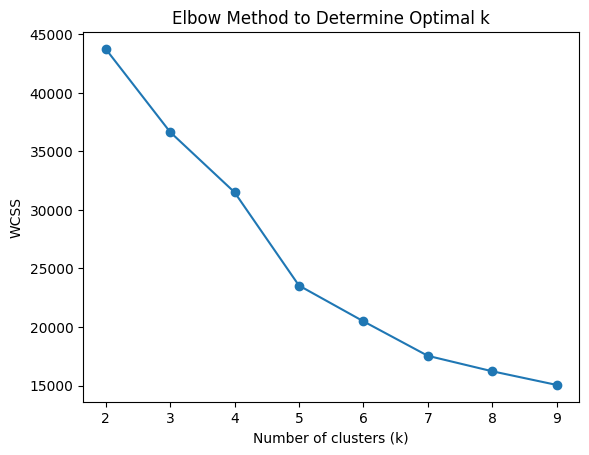

In [33]:
wcss = []  # Store the WCSS (Within-Cluster Sum of Squares) for each k value  
for k in range(2, 10):  # Test k values from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  

# Plot elbow method
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [34]:
# k is 6 (based on the elbow method result)
kmeans = KMeans(n_clusters=6, random_state=42)
clean_datan1['cluster'] = kmeans.fit_predict(scaled_features)

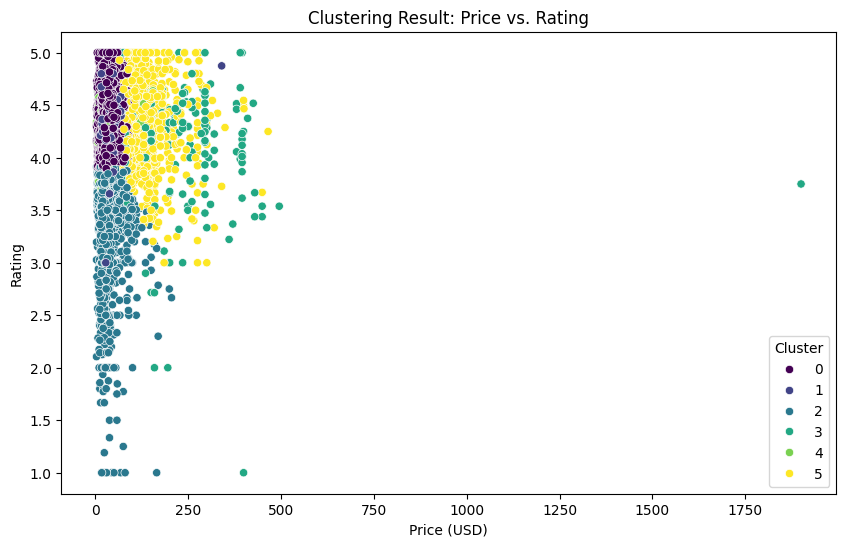

In [35]:
# Plot the clustering results of Price vs. Rating
plt.figure(figsize=(10, 6))
sb.scatterplot(x=clean_datan1['price_usd'], y=clean_datan1['rating'], hue=clean_datan1['cluster'], palette='viridis')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.title('Clustering Result: Price vs. Rating')
plt.legend(title='Cluster')
plt.show()

C:\Users\annie\AppData\Local\Temp\ipykernel_26744\1874877278.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x=clean_datan1['cluster'], palette="coolwarm")


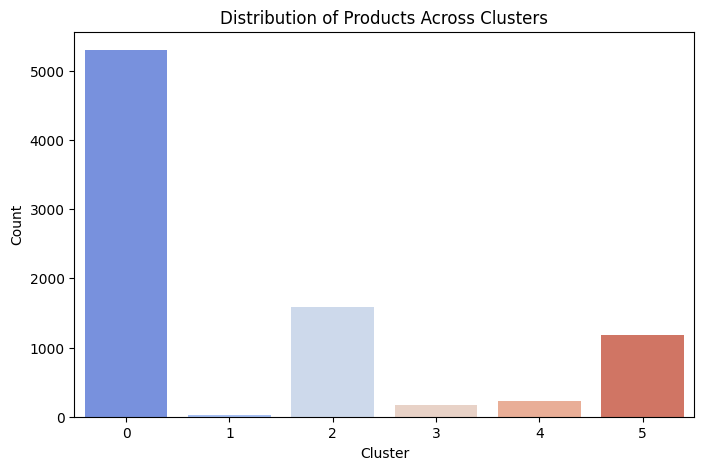

In [36]:
plt.figure(figsize=(8, 5))
sb.countplot(x=clean_datan1['cluster'], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Products Across Clusters")
plt.show()

Cluster 0 (Purple) → Low Price, High Rating
- These products are mostly priced under $50, but have very high ratings (4.5 - 5.0).
- They are likely popular and well-rated budget products.
  
Cluster 1 (Dark Blue) → High Price, Unstable Rating
- These products cost more than $300, but their ratings vary widely (1.0 - 5.0).
- They may be luxury or premium products, but some customers feel they are not worth the price.

Cluster 2 (Blue-Green) → Affordable Market, Mixed Rating
- Mostly priced under $100, with ratings ranging from 2.0 to 5.0.
- These products belong to the mass-market segment, receiving both positive and average reviews.

Cluster 3 (Green) → Low Price, Mixed Ratings
- Priced between $0 - $250, with ratings ranging from 1.0 to 5.0.
- These are products with varied customer experiences, likely due to different user preferences.

Cluster 4 (Light Green) → Low Price, Moderate Rating
- Priced under $100, with ratings mostly between 3.0 - 4.0.
- These may be decent but unremarkable products, not as highly rated as Cluster 0 but still selling well.

Cluster 5 (Yellow) → Low Price, Polarized Ratings
- Priced between $0 - $200, but ratings are either very high (5.0) or very low (1.0).
- These products might be controversial or niche, loved by some and disliked by others (e.g., skincare products that work differently depending on skin type).

# Cluster 0  (Low Price, High Rating) 

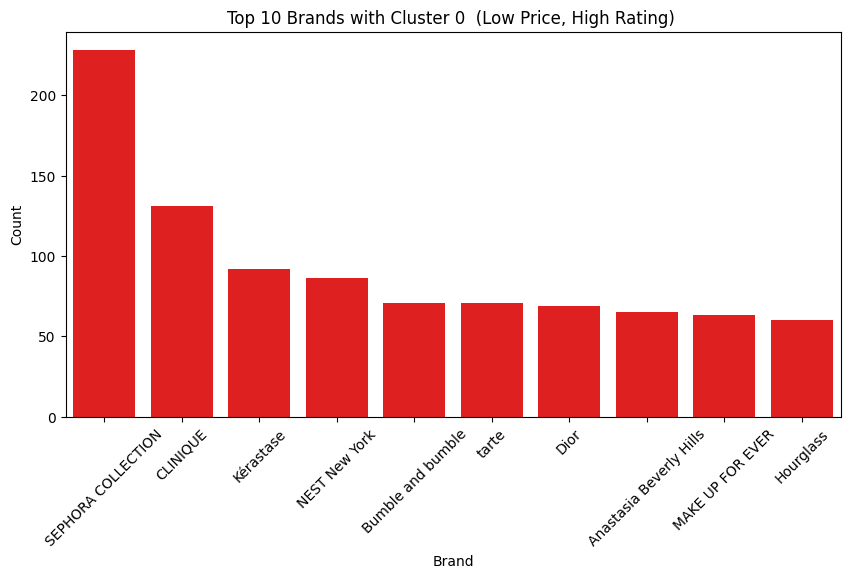

In [37]:
# Filter Cluster 0  (Low Price, High Rating)
cluster_0 = clean_datan1[clean_datan1['cluster'] == 0]

### Plot Top 10 Brands with Most High-Rated Products ###
cluster_0 = cluster_0['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=cluster_0.index, y=cluster_0.values, color="red")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands with Cluster 0  (Low Price, High Rating) ")
plt.show()

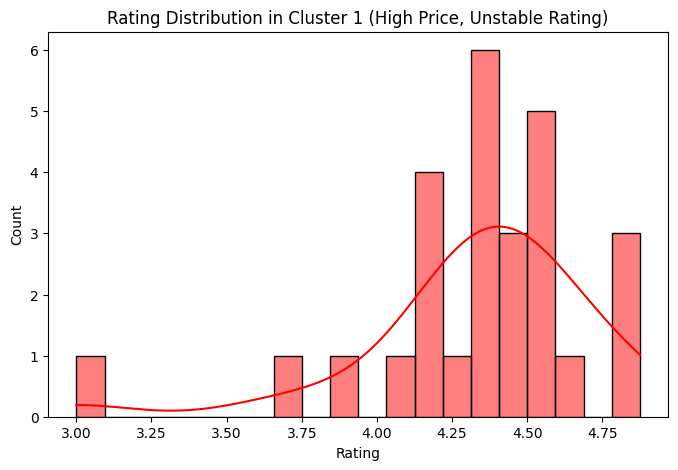

In [38]:
# Ensure 'rating' column exists and is numeric
clean_datan1['rating'] = pd.to_numeric(clean_datan1['rating'], errors='coerce')

# Filter Cluster 1
cluster_1 = clean_datan1[clean_datan1['cluster'] == 1]

###  Rating Distribution in Cluster 1 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_1['rating'], bins=20, kde=True, color="red")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 1 (High Price, Unstable Rating)")
plt.show()

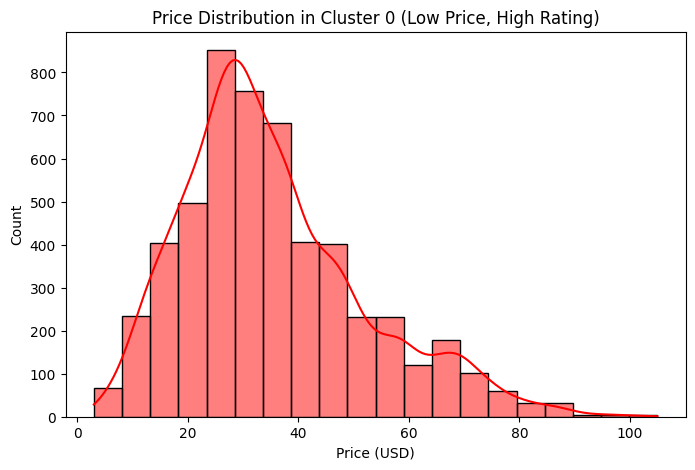

In [39]:
# Ensure 'price_usd' column exists and is numeric
clean_datan1['price_usd'] = pd.to_numeric(clean_datan1['price_usd'], errors='coerce')
cluster_0 = clean_datan1[clean_datan1['cluster'] == 0]

###  Price Distribution in Cluster 0 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_0['price_usd'], bins=20, kde=True, color="red")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 0 (Low Price, High Rating)")
plt.show()

# Cluster 1 (High Price, Unstable Rating)

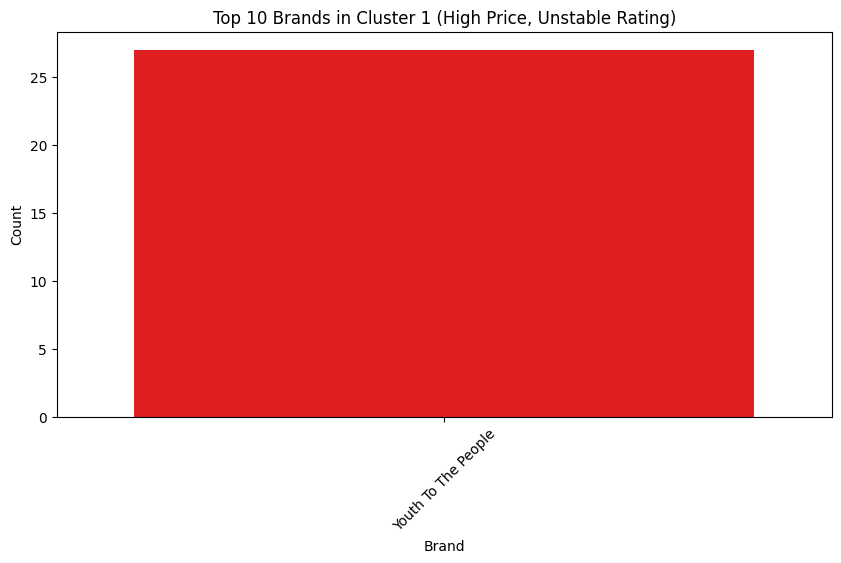

In [40]:
# Filter Cluster 1 (High Price, Unstable Rating)
cluster_1 = clean_datan1[clean_datan1['cluster'] == 1]

### Plot Top 10 Brands in Cluster 1 ###
cluster_1= cluster_1['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=cluster_1.index, y=cluster_1.values, color="red")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands in Cluster 1 (High Price, Unstable Rating)")
plt.show()

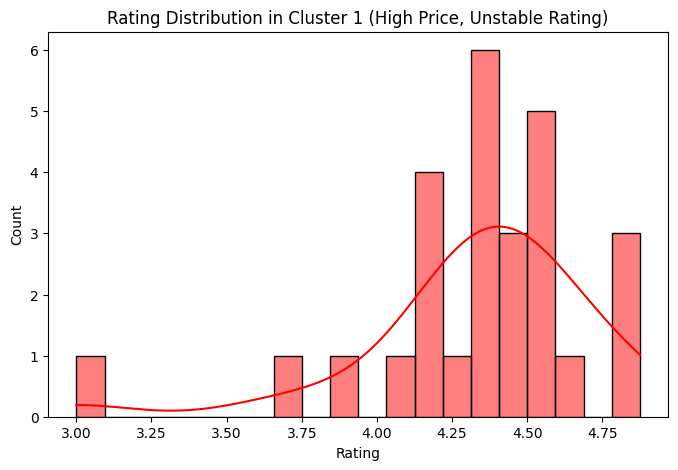

In [41]:
# Ensure 'rating' column exists and is numeric
clean_datan1['rating'] = pd.to_numeric(clean_datan1['rating'], errors='coerce')

# Re-filter Cluster 1
cluster_1 = clean_datan1[clean_datan1['cluster'] == 1]

### Rating Distribution in Cluster 1 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_1['rating'], bins=20, kde=True, color="red")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 1 (High Price, Unstable Rating)")
plt.show()

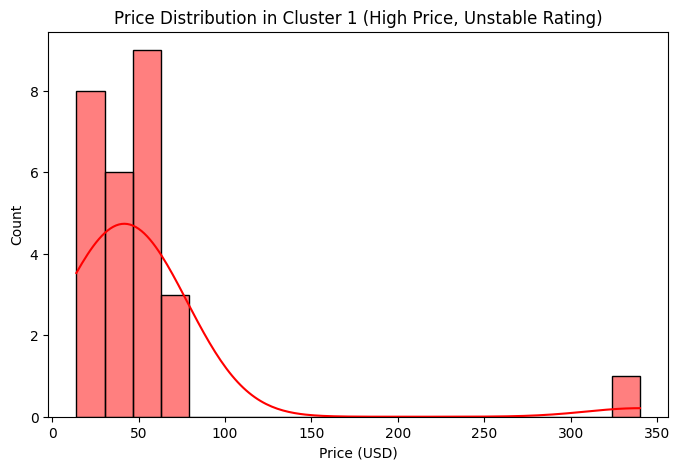

In [42]:
# Filter Cluster 1
cluster_1 = clean_datan1[clean_datan1['cluster'] == 1]

### Price Distribution in Cluster 1 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_1['price_usd'], bins=20, kde=True, color="red")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 1 (High Price, Unstable Rating)")
plt.show()

# Cluster 2 (Affordable Market, Mixed Rating) 

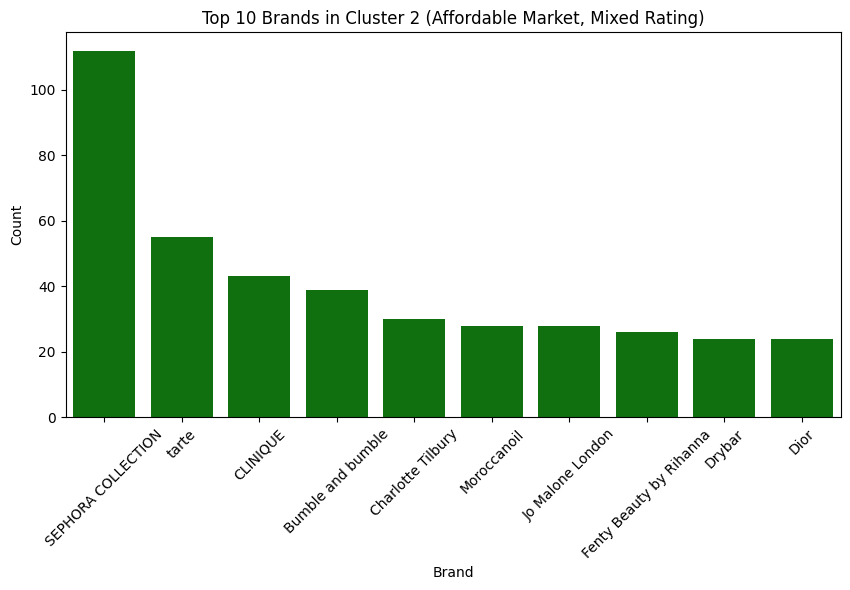

In [43]:
# Filter Cluster 2 (Affordable Market, Mixed Rating)
cluster_2 = clean_datan1[clean_datan1['cluster'] == 2]

# Get the top 10 brands in Cluster 2
top_10_brands_c2 = cluster_2['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=top_10_brands_c2.index, y=top_10_brands_c2.values, color="green")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands in Cluster 2 (Affordable Market, Mixed Rating)")
plt.show()

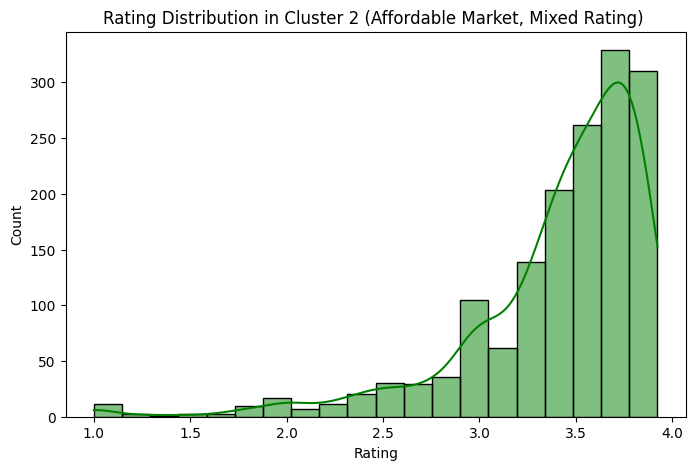

In [44]:
### Rating Distribution in Cluster 2 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_2['rating'], bins=20, kde=True, color="green")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 2 (Affordable Market, Mixed Rating) ")
plt.show()

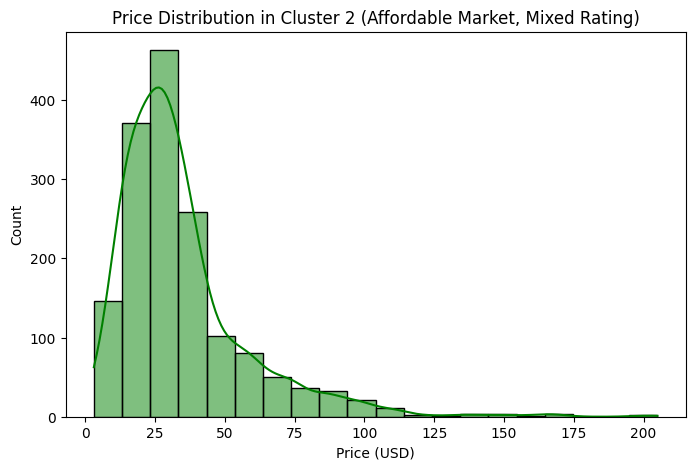

In [45]:
### Price Distribution in Cluster 2 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_2['price_usd'], bins=20, kde=True, color="green")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 2 (Affordable Market, Mixed Rating)")
plt.show()

# Cluster 3 (Low Price, Mixed Ratings)

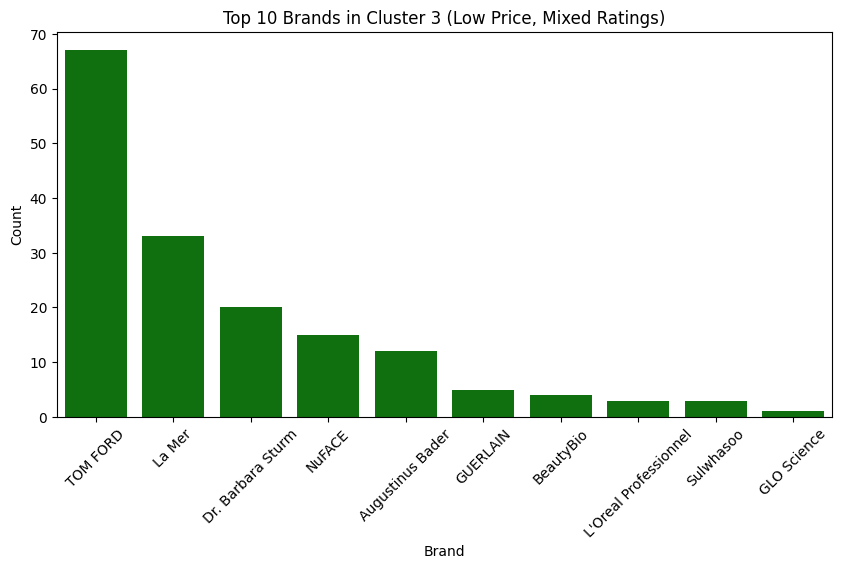

In [46]:
cluster_3 = clean_datan1[clean_datan1['cluster'] == 3]

# Get the top 10 brands in Cluster 3
top_10_brands_c3 = cluster_3['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=top_10_brands_c3.index, y=top_10_brands_c3.values, color="green")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands in Cluster 3 (Low Price, Mixed Ratings)")
plt.show()

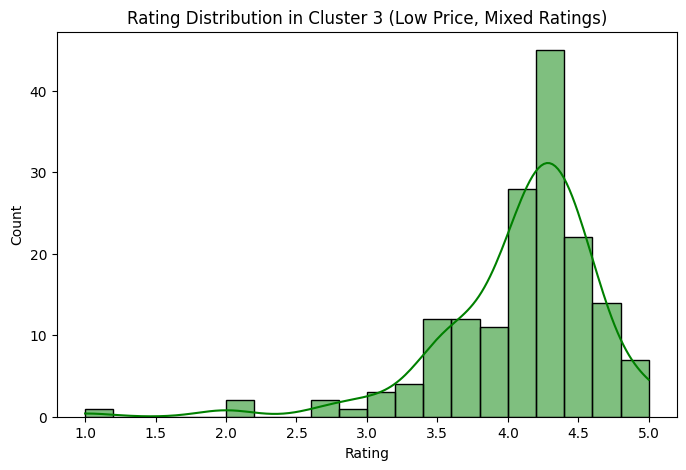

In [47]:
### Rating Distribution in Cluster 3 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_3['rating'], bins=20, kde=True, color="green")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 3 (Low Price, Mixed Ratings)")
plt.show()

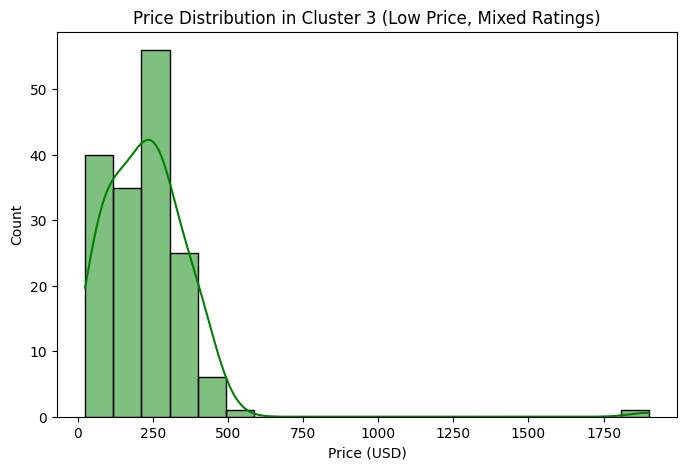

In [48]:
### Price Distribution in Cluster 3 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_3['price_usd'], bins=20, kde=True, color="green")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 3 (Low Price, Mixed Ratings)")
plt.show()

# Cluster 4 (Low Price, Moderate Rating)

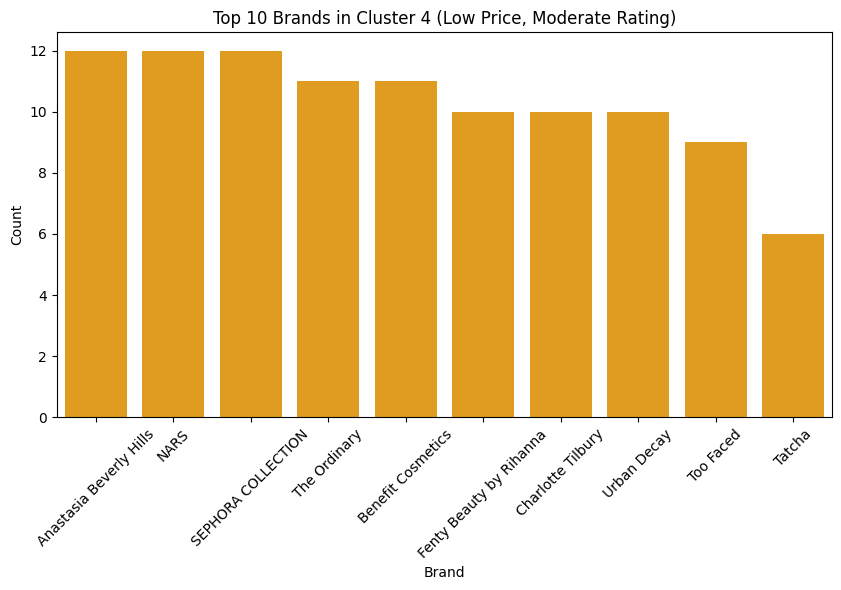

In [49]:
# Filter Cluster 4
cluster_4 = clean_datan1[clean_datan1['cluster'] == 4]

###Top 10 Brands in Cluster 4 ###
top_10_brands_c4 = cluster_4['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=top_10_brands_c4.index, y=top_10_brands_c4.values, color="orange")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands in Cluster 4 (Low Price, Moderate Rating)")
plt.show()

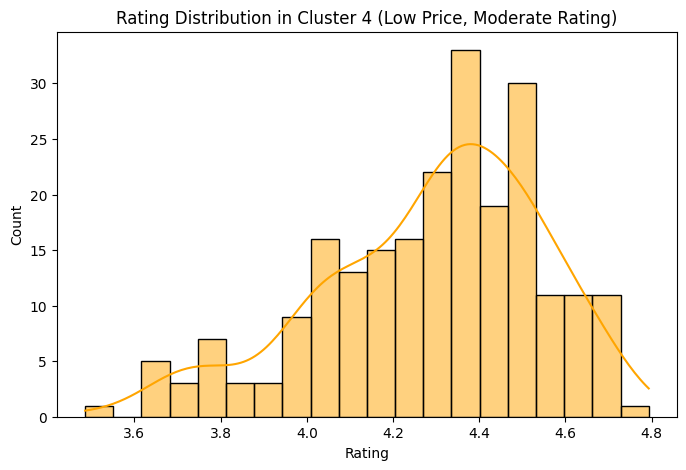

In [50]:
### Rating Distribution in Cluster 4 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_4['rating'], bins=20, kde=True, color="orange")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 4 (Low Price, Moderate Rating)")
plt.show()

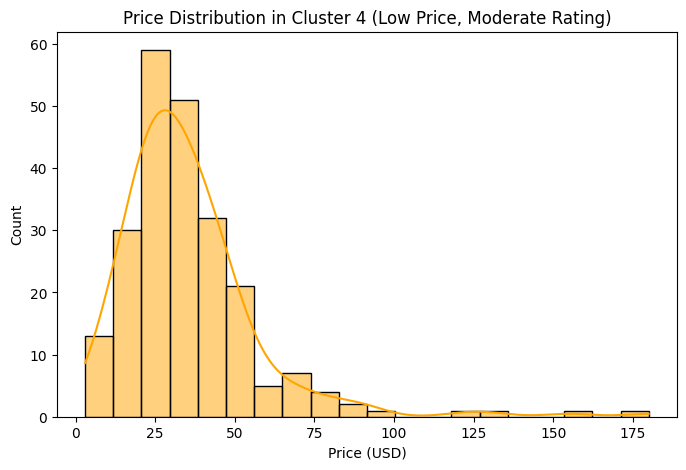

In [51]:
### Price Distribution in Cluster 4 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_4['price_usd'], bins=20, kde=True, color="orange")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 4 (Low Price, Moderate Rating)")
plt.show()

# Cluster 5 (Low Price, Polarized Ratings) 

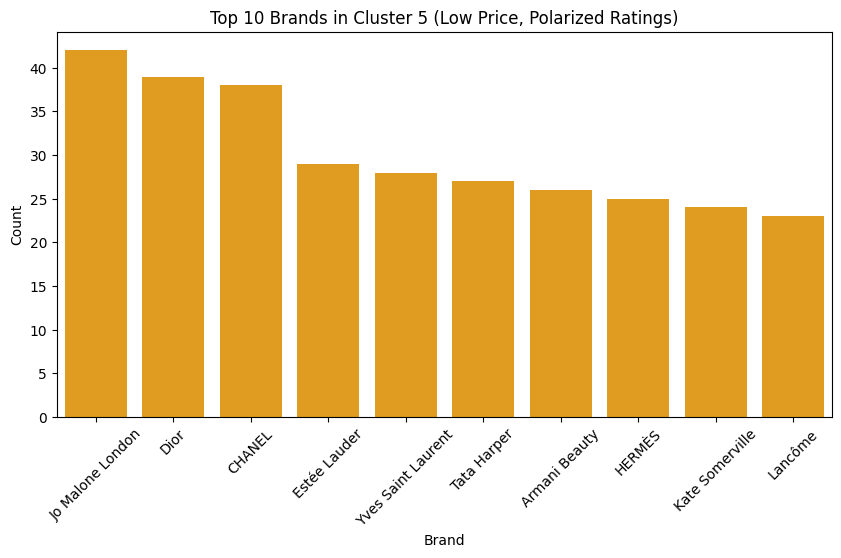

In [52]:
# Filter Cluster 5
cluster_5 = clean_datan1[clean_datan1['cluster'] == 5]

### Top 10 Brands in Cluster 5 ###
top_10_brands_c5 = cluster_5['brand_name'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sb.barplot(x=top_10_brands_c5.index, y=top_10_brands_c5.values, color="orange")
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands in Cluster 5 (Low Price, Polarized Ratings)")
plt.show()

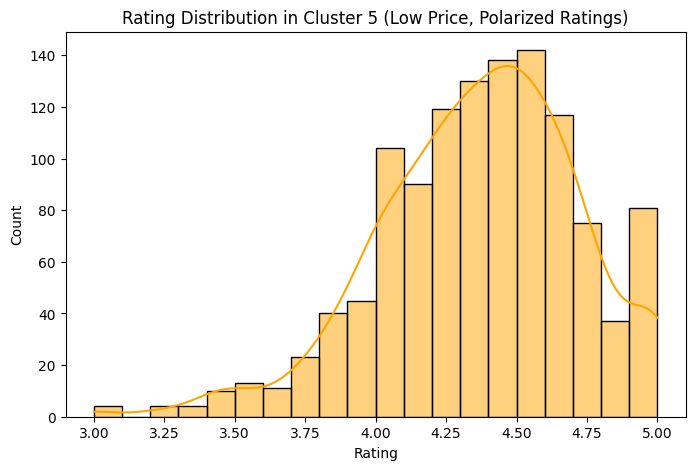

In [53]:
###  Rating Distribution in Cluster 5 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_5['rating'], bins=20, kde=True, color="orange")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Distribution in Cluster 5 (Low Price, Polarized Ratings)")
plt.show()

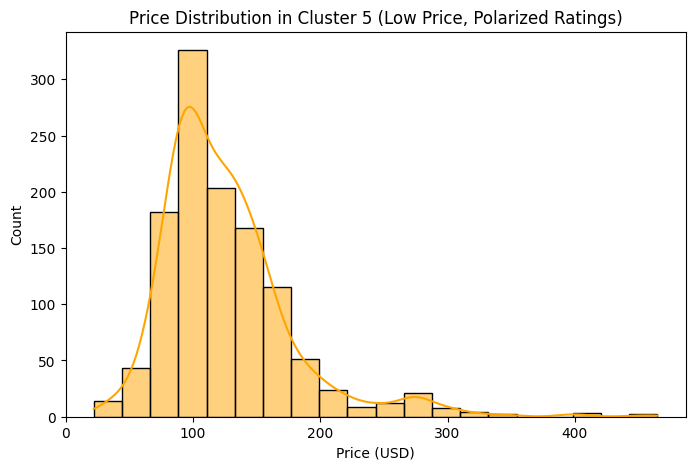

In [54]:
### Price Distribution in Cluster 5 ###
plt.figure(figsize=(8, 5))
sb.histplot(cluster_5['price_usd'], bins=20, kde=True, color="orange")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.title("Price Distribution in Cluster 5 (Low Price, Polarized Ratings)")
plt.show()

## Business Strategy:
Cluster 0 (High-Rated Budget Products) → Increase price slightly, upsell bundles.
- Example: If a $30 moisturizer is highly rated, increase it to $35-$40 while keeping affordability.

Cluster 1 (Luxury but Mixed Ratings) → Address negative reviews, justify pricing with premium perks.
- Example: Sell a $50 travel-size version of a $300 luxury serum to encourage first-time buyers.

Cluster 2 (Affordable but Inconsistent Performance) → Optimize product descriptions, use influencer marketing.
- Example: Reformulate or remove products with <3.5-star ratings to strengthen the brand’s reputation.

Cluster 3 (Controversial but Cheap Products) → Improve targeting, highlight suitability.
- Example: If a $50 foundation works only for dry skin, clearly market it as "for dry skin only".

Cluster 4 (Average Budget Products) → Consider rebranding or price discounts.
- Example: If a $15 cleanser looks cheap, upgrade to sleek, eco-friendly packaging to boost appeal.

Cluster 5 (Polarized Reviews, Niche Appeal) → Market to the right audience, offer better usage guidance.
- Example: If a $20 fragrance has mixed reviews, use niche influencers who genuinely like the scent.